In [ ]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt

from sklearn import datasets

In [ ]:
alpha               = 0.01    # --- Learning rate
numIter             = 5000    # --- Number of gradient descent iterations
batchSize           = 64      # --- Batch size for the train data

In [ ]:
numFeatures         = 2       # --- Number of features (each image is a 28 x 28 image, 
                              #     to be flattened to a row of 784 elements)

irisDataset     = datasets.load_iris()

# --- Takes columns 0 and 3 from the iris dataset
xDataset        = np.array([[x[0], x[3]] for x in irisDataset.data])
yDataset        = np.array([1 if y == 0 else -1 for y in irisDataset.target])

# --- Randomly take 90% of the iris dataset for the training set. The rest is used for the test set.
# --- https://docs.scipy.org/doc//numpy-1.10.4/reference/generated/numpy.random.choice.html
trainIndices    = np.random.choice(len(xDataset), round(len(xDataset) * 0.9), replace = False)
# --- https://www.w3schools.com/python/numpy_ufunc_set_operations.asp
testIndices     = np.array(list(set(range(len(xDataset))) - set(trainIndices)))
xTrain          = xDataset[trainIndices]
xTest           = xDataset[testIndices]
yTrain          = yDataset[trainIndices]
yTest           = yDataset[testIndices]

In [ ]:
# --- Random value generator to initialize weights.
#randomInitWeights = tf.initializers.RandomNormal()
randomInitWeights = tf.initializers.Zeros()

# --- Parameters to be optimized
w = tf.Variable(randomInitWeights([numFeatures, 1], dtype = np.float64))
w0 = tf.Variable(randomInitWeights([1, 1], dtype = np.float64))

# --- Cost function
def costFunction(xData, yTarget):
  #model               = tf.subtract(tf.matmul(xData, w), b)
  model               = tf.add(tf.matmul(xData, w), w0)
  regularizationTerm  = tf.reduce_sum(tf.square(w))
  classificationTerm  = tf.reduce_mean(tf.maximum(0., tf.subtract(1., tf.multiply(model, yTarget))))
  return tf.add(classificationTerm, tf.multiply(alpha, regularizationTerm))

# --- Setting the Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(alpha)

# --- Optimization step
def optimizationStep(features, classes):
    # --- Uses GradientTape for automatic differentiation
    with tf.GradientTape() as g:
        costFunctionValue = costFunction(features, classes)

    # --- Compute gradients
    gradients = g.gradient(costFunctionValue, [w, w0])
    
    # --- Update the unknowns W and w0
    optimizer.apply_gradients(zip(gradients, [w, w0]))

In [ ]:
def predictionAccuracy(xData, yTarget):
  
  #model        = tf.subtract(tf.matmul(xData, A), w0)
  model        = tf.add(tf.matmul(xData, w), w0)
  prediction   = tf.reshape(tf.sign(model), [-1])
  accuracy     = tf.reduce_mean(tf.cast(tf.equal(prediction, yTarget), tf.float32))

  return accuracy

In [ ]:
costFunctionVec   = []
testAccuracyVec   = []

# --- Optimization loop
for i in range(numIter):
  indexBatch    = np.random.choice(len(xTrain), size = batchSize)
  xBatch        = xTrain[indexBatch]
  yBatch        = np.transpose([yTrain[indexBatch]])
  
  optimizationStep(xBatch, yBatch)

  currentCost             = costFunction(xBatch, yBatch)
  currentTestPrediction   = predictionAccuracy(xTest, yTest)
  print('Cost function = {}; accuracy = {}'.format(currentCost, currentTestPrediction))

  costFunctionVec.append(currentCost)
  testAccuracyVec.append(currentTestPrediction)

Output streaming troncato alle ultime 5000 righe.
Cost function = 0.9668993570288466; accuracy = 0.8666666746139526
Cost function = 0.8630923830481279; accuracy = 0.8666666746139526
Cost function = 0.9148493343831292; accuracy = 0.8666666746139526
Cost function = 0.6940668486905046; accuracy = 0.8666666746139526
Cost function = 0.9002010682251194; accuracy = 0.8666666746139526
Cost function = 0.6717471249626523; accuracy = 0.8666666746139526
Cost function = 0.6171336467711882; accuracy = 0.8666666746139526
Cost function = 0.5323134128930916; accuracy = 0.8666666746139526
Cost function = 0.5338523464920717; accuracy = 0.8666666746139526
Cost function = 0.591144475833492; accuracy = 0.8666666746139526
Cost function = 0.37656904858378043; accuracy = 0.8666666746139526
Cost function = 0.6829099262168629; accuracy = 0.8666666746139526
Cost function = 0.6116392399625181; accuracy = 0.8666666746139526
Cost function = 0.5410578126298102; accuracy = 0.8666666746139526
Cost function = 0.71950279

In [ ]:
# --- Computing the dividing line
m             = -w[1] / w[0]
x0            = -w0    / w[0]
xSep          = [x[1] for x in xDataset]
ySep          = [m * x + x0 for x in xSep]

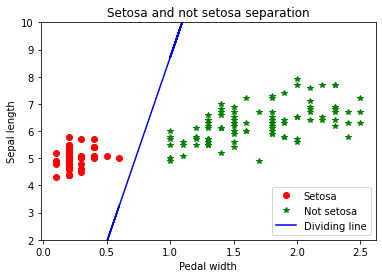

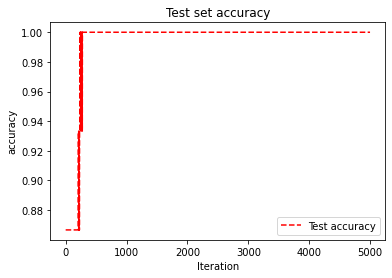

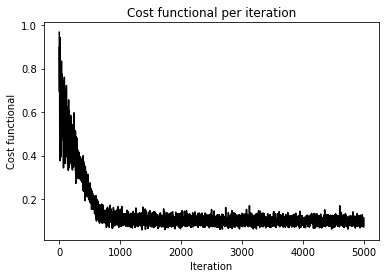

In [ ]:
setosaX       = [d[1] for i, d in enumerate(xDataset) if yDataset[i] ==  1]
setosaY       = [d[0] for i, d in enumerate(xDataset) if yDataset[i] ==  1]
notSetosaX    = [d[1] for i, d in enumerate(xDataset) if yDataset[i] == -1]
notSetosaY    = [d[0] for i, d in enumerate(xDataset) if yDataset[i] == -1]

plt.plot(setosaX,    setosaY,     'ro', label = 'Setosa')
plt.plot(notSetosaX, notSetosaY,  'g*', label = 'Not setosa')
plt.plot(np.reshape(xSep, (len(xSep), 1)), np.reshape(ySep, (len(ySep), 1)), 'b-', label='Dividing line')
plt.ylim([2, 10])
plt.title('Setosa and not setosa separation')
plt.xlabel('Pedal width')
plt.ylabel('Sepal length')
plt.legend(loc = 'lower right')
plt.show()

plt.plot(testAccuracyVec, 'r--', label = 'Test accuracy')
plt.title('Test set accuracy')
plt.xlabel('Iteration')
plt.ylabel('accuracy')
plt.legend(loc = 'lower right')
plt.show()

plt.plot(costFunctionVec, 'k-')
plt.title('Cost functional per iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost functional')
plt.show()